Syndrome Images


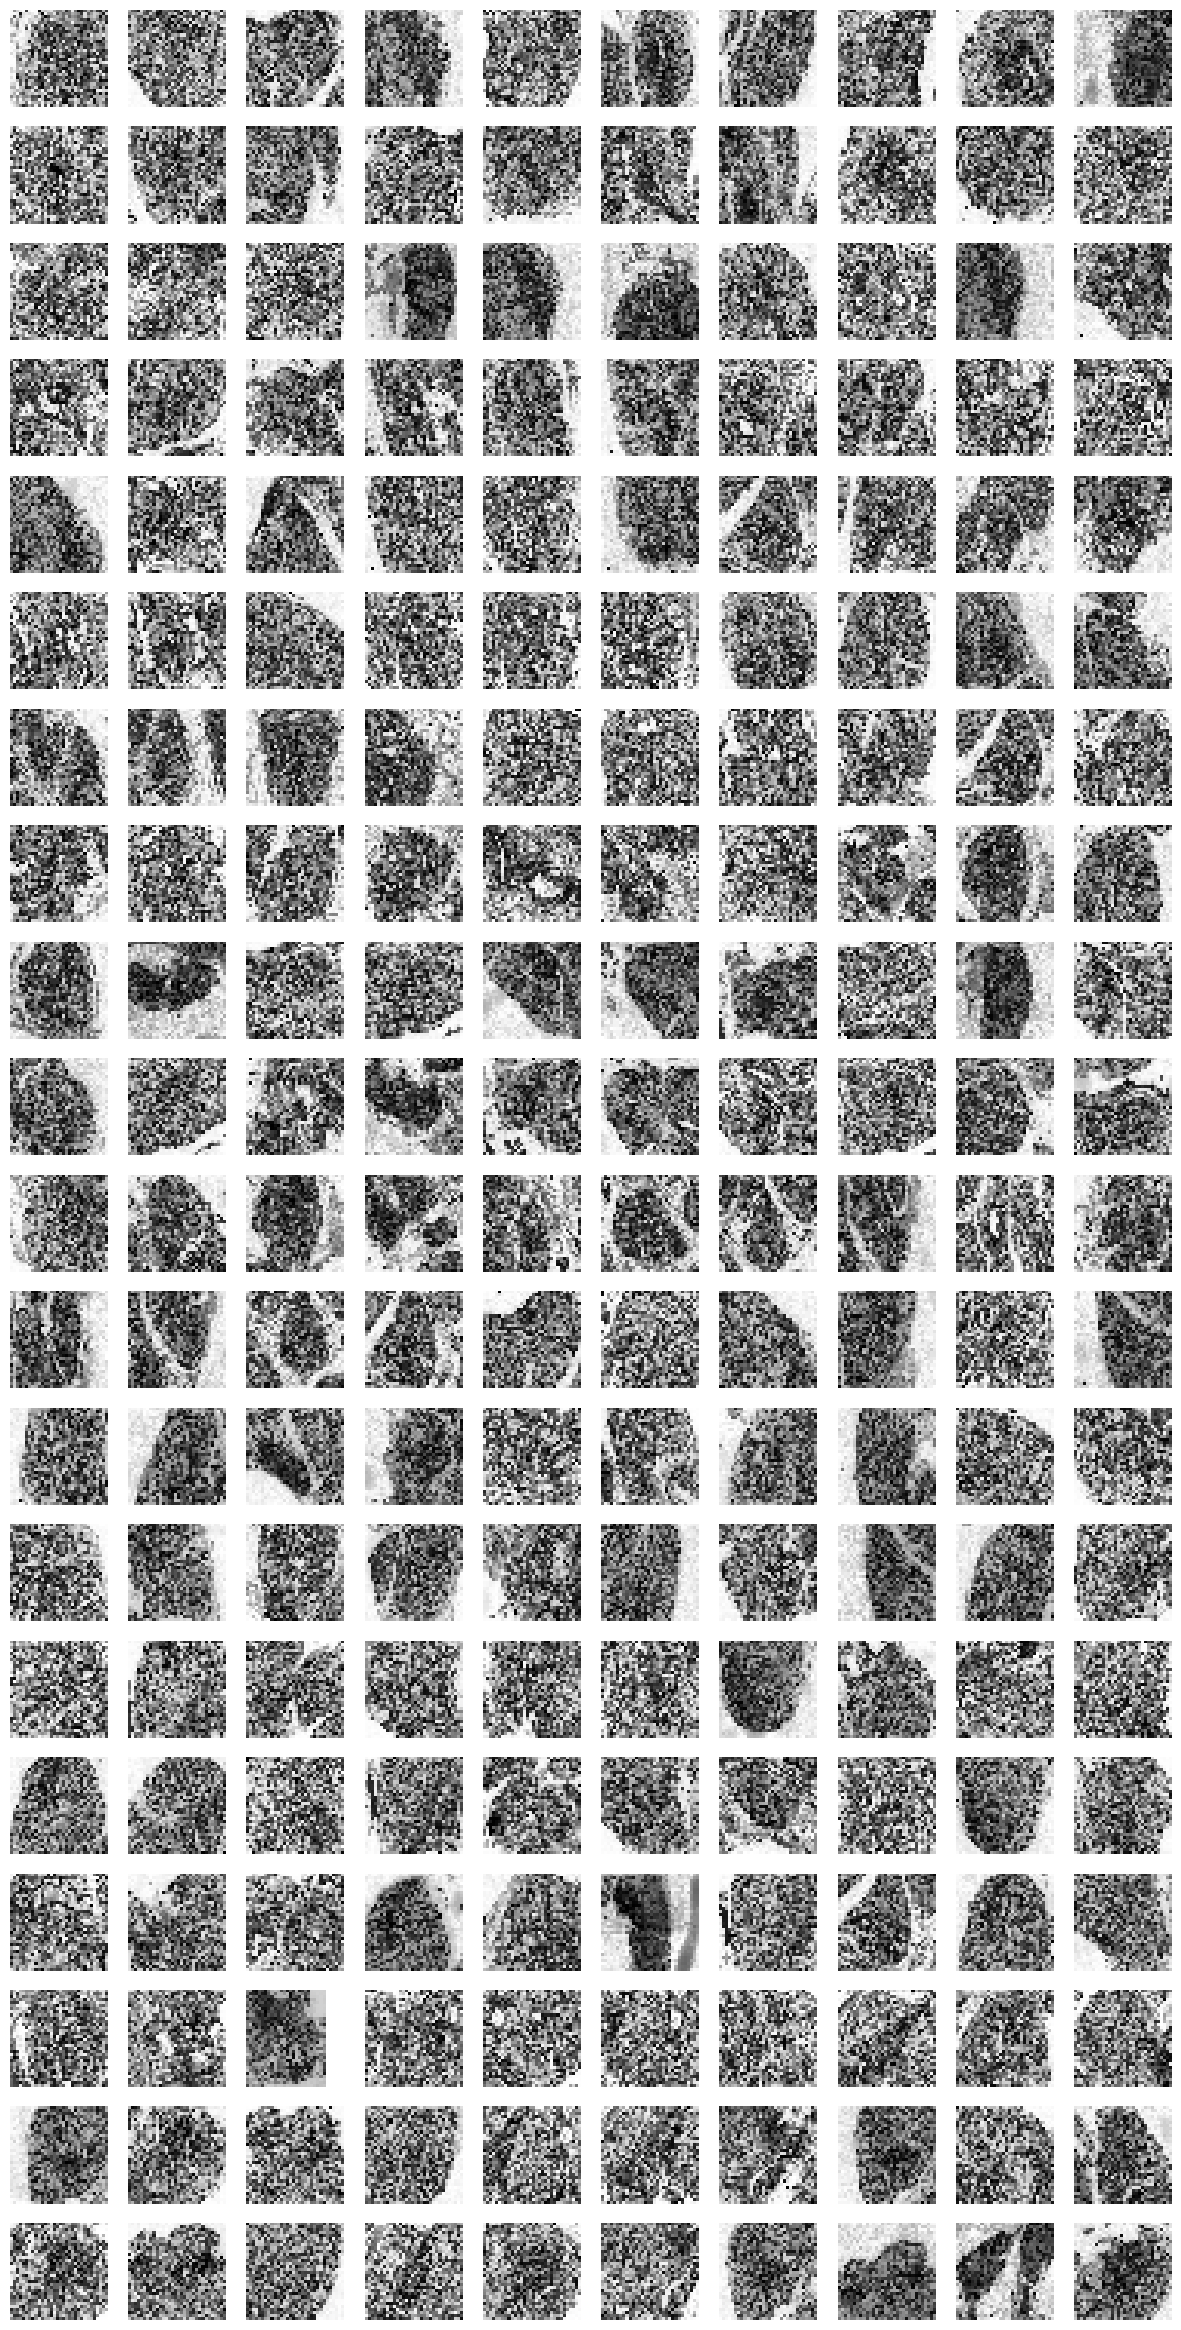

Non Syndrome Images


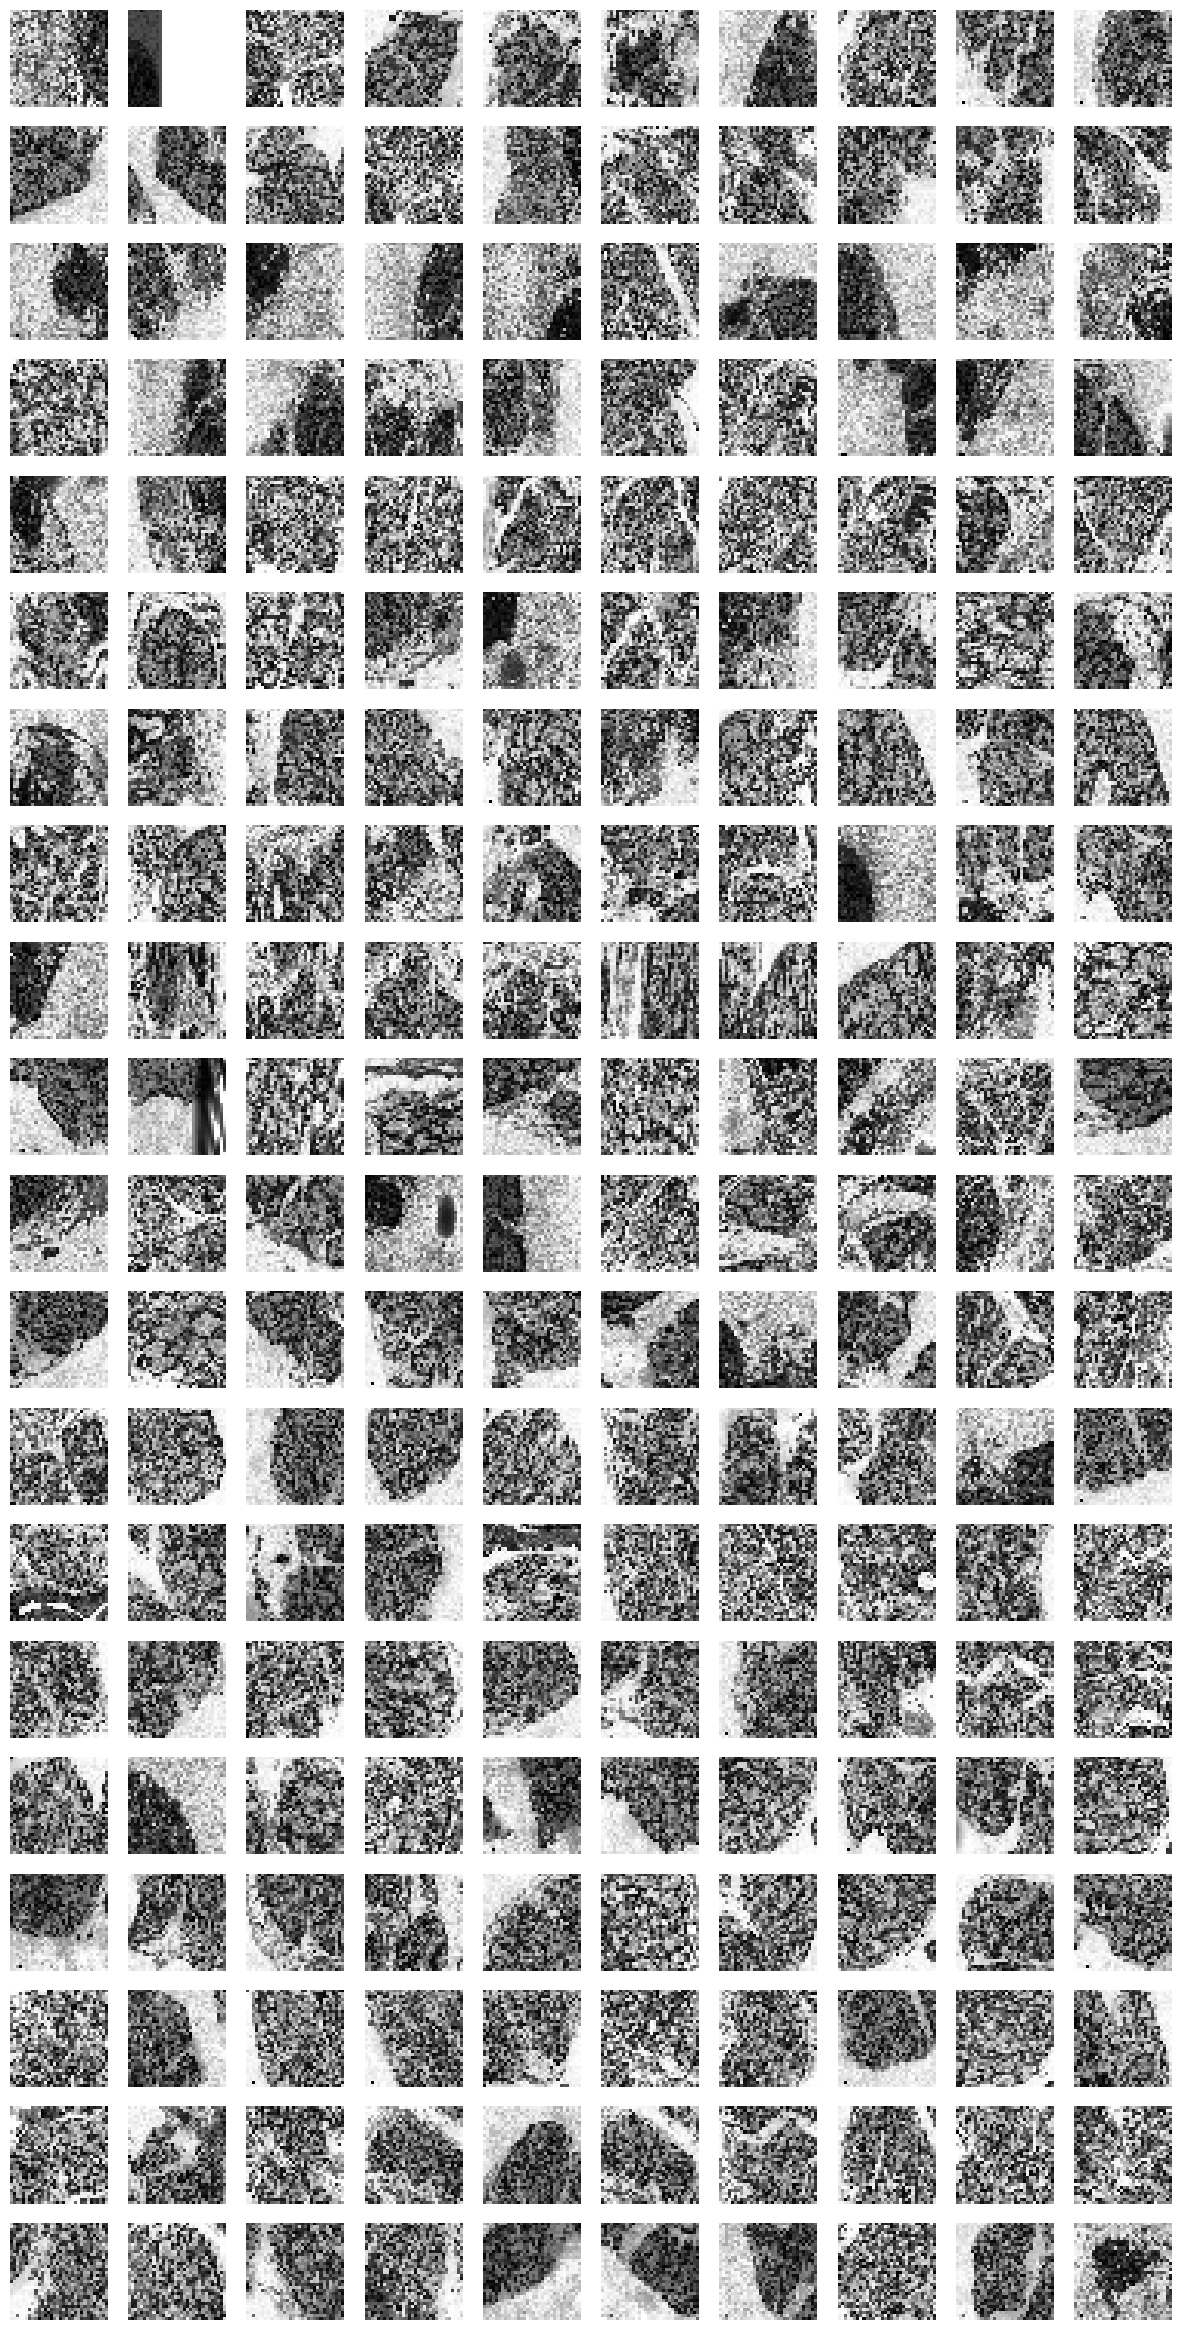

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2

def read_h5_images(h5_file):
    image_arrays = []
    with h5py.File(h5_file, 'r') as hf:
        keys = list(hf.keys())
        num_images = min(200, len(keys))

        for i in range(num_images):
            image_data = hf[keys[i]][()]
            image_arrays.append(image_data)

    return image_arrays

def display_images(image_arrays):
    num_images = len(image_arrays)
    num_rows = int(np.ceil(num_images / 10))
    fig, axes = plt.subplots(num_rows, 10, figsize=(15, num_rows * 1.5))

    for i in range(num_images):
        if num_rows > 1:
            ax = axes[i // 10, i % 10]
        else:
            ax = axes[i % 10]
        ax.imshow(image_arrays[i], cmap='gray')
        ax.axis('off')

    plt.show()

syndrome_images = read_h5_images('syndrome_data_200_32.h5')
non_syndrome_images = read_h5_images('non_syndrome_data_200_32.h5')

syndrome_images = np.array(syndrome_images) / 255
non_syndrome_images = np.array(non_syndrome_images) / 255

syndrome_labels = np.ones(len(syndrome_images))
non_syndrome_labels = np.zeros(len(non_syndrome_images))

print('Syndrome Images')
display_images(syndrome_images)
print('Non Syndrome Images')
display_images(non_syndrome_images)

In [3]:
import numpy as np
from PIL import Image
from torchvision import transforms

def augment_data(images_array, num_augmentations=1):
    n, height, width = images_array.shape

    # Initialize an array to store augmented images
    augmented_images = np.zeros((n * (num_augmentations + 1), height, width))

    for i in range(n):
        # Original image
        augmented_images[i * (num_augmentations + 1)] = images_array[i]

        for j in range(num_augmentations):
            # Convert to PIL Image
            pil_image = Image.fromarray(images_array[i])

            # Define torchvision transformations for data augmentation
            data_transforms = transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(degrees=(-15, 15)),
            ])

            # Apply torchvision transformations
            transformed_image = np.array(data_transforms(pil_image))

            # Store in the augmented array
            augmented_images[i * (num_augmentations + 1) + j + 1] = transformed_image

    return augmented_images

syndrome_images_augmented = augment_data(syndrome_images, num_augmentations=1)
non_syndrome_images_augmented = augment_data(non_syndrome_images, num_augmentations=1)

print("Shape of augmented syndrome images:", syndrome_images_augmented.shape)
print("Shape of augmented non-syndrome images:", non_syndrome_images_augmented.shape)

Streaming output truncated to the last 5000 lines.
[[[0.80392157 0.85098039 0.76078431 ... 0.05882353 0.14509804 0.16862745]
  [0.92156863 0.47058824 0.42745098 ... 0.2745098  0.10196078 0.03529412]
  [0.87058824 0.80392157 0.78431373 ... 0.16470588 0.25882353 0.14509804]
  ...
  [0.72156863 0.8745098  0.35686275 ... 0.0745098  0.25098039 0.57647059]
  [0.52941176 0.65490196 0.36078431 ... 0.76470588 0.30196078 0.05490196]
  [0.94901961 0.80784314 0.84705882 ... 0.71764706 0.30588235 0.16862745]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.03137255 ... 0.50588238 0.         0.        ]
  ...
  [0.         0.         0.60000002 ... 0.4509804  0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]

 [[0.2745098  0.2745098  0.21176471 ... 1.   

In [4]:
syndrome_images = syndrome_images_augmented
non_syndrome_images = non_syndrome_images_augmented

syndrome_labels = np.ones(len(syndrome_images_augmented))
non_syndrome_labels = np.zeros(len(non_syndrome_images_augmented))

print(syndrome_labels)
print(non_syndrome_labels)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [5]:
! pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 56.4 MB/s eta 0:00:00


In [6]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [7]:
n_layers=1

SAVE_PATH = "quanvolution/"
np.random.seed(0)
tf.random.set_seed(0)

In [8]:
# Combine the data and labels
images = np.concatenate((syndrome_images, non_syndrome_images), axis=0)
labels = np.concatenate((syndrome_labels, non_syndrome_labels), axis=0)

# Add a new axis to train_images and test_images
images = images[..., tf.newaxis]

# Verify the shapes of the resulting TensorFlow tensors
print("Images Shape (with extra dimension):", images.shape)

Images Shape (with extra dimension): (800, 32, 32, 1)


In [9]:
dev = qml.device("default.qubit", wires=4)
# Random circuit parameters
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

@qml.qnode(dev)
def circuit(phi):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

drawer = qml.draw(circuit)
print(drawer([0, 0, 0, 0]))

0: ──RY(0.00)─╭RandomLayers(M0)─┤  <Z>
1: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
2: ──RY(0.00)─├RandomLayers(M0)─┤  <Z>
3: ──RY(0.00)─╰RandomLayers(M0)─┤  <Z>

M0 = 
[[3.72495259 5.30467815 5.3906313  5.32343968]]


In [10]:
def quanv(image):
    """Convolves the input image with many applications of the same quantum circuit."""
    out = np.zeros((16, 16, 4))

    # Loop over the coordinates of the top-left pixel of 2X2 squares
    for j in range(0, 32, 2):
        for k in range(0, 32, 2):
            # Process a squared 2x2 region of the image with a quantum circuit
            q_results = circuit(
                [
                    image[j, k, 0],
                    image[j, k + 1, 0],
                    image[j + 1, k, 0],
                    image[j + 1, k + 1, 0]
                ]
            )
            # Assign expectation values to different channels of the output pixel (j/2, k/2)
            for c in range(4):
                out[j // 2, k // 2, c] = q_results[c]
    return out

In [17]:
q_images = []
print("Quantum pre-processing of images:")
for idx, img in enumerate(images):
    print("{}/{}".format(idx + 1, len(images)))
    q_images.append(quanv(img))
q_images = np.asarray(q_images)

# Save pre-processed images
np.save(SAVE_PATH + "q_images_32_augmented.npy", q_images)

Quantum pre-processing of images:
1/800
2/800
3/800
4/800
5/800
6/800
7/800
8/800
9/800
10/800
11/800
12/800
13/800
14/800
15/800
16/800
17/800
18/800
19/800
20/800
21/800
22/800
23/800
24/800
25/800
26/800
27/800
28/800
29/800
30/800
31/800
32/800
33/800
34/800
35/800
36/800
37/800
38/800
39/800
40/800
41/800
42/800
43/800
44/800
45/800
46/800
47/800
48/800
49/800
50/800
51/800
52/800
53/800
54/800
55/800
56/800
57/800
58/800
59/800
60/800
61/800
62/800
63/800
64/800
65/800
66/800
67/800
68/800
69/800
70/800
71/800
72/800
73/800
74/800
75/800
76/800
77/800
78/800
79/800
80/800
81/800
82/800
83/800
84/800
85/800
86/800
87/800
88/800
89/800
90/800
91/800
92/800
93/800
94/800
95/800
96/800
97/800
98/800
99/800
100/800
101/800
102/800
103/800
104/800
105/800
106/800
107/800
108/800
109/800
110/800
111/800
112/800
113/800
114/800
115/800
116/800
117/800
118/800
119/800
120/800
121/800
122/800
123/800
124/800
125/800
126/800
127/800
128/800
129/800
130/800
131/800
132/800
133/800
134/800
13

In [18]:
# Load pre-processed images
q_images = np.load(SAVE_PATH + "q_images_32_augmented.npy")

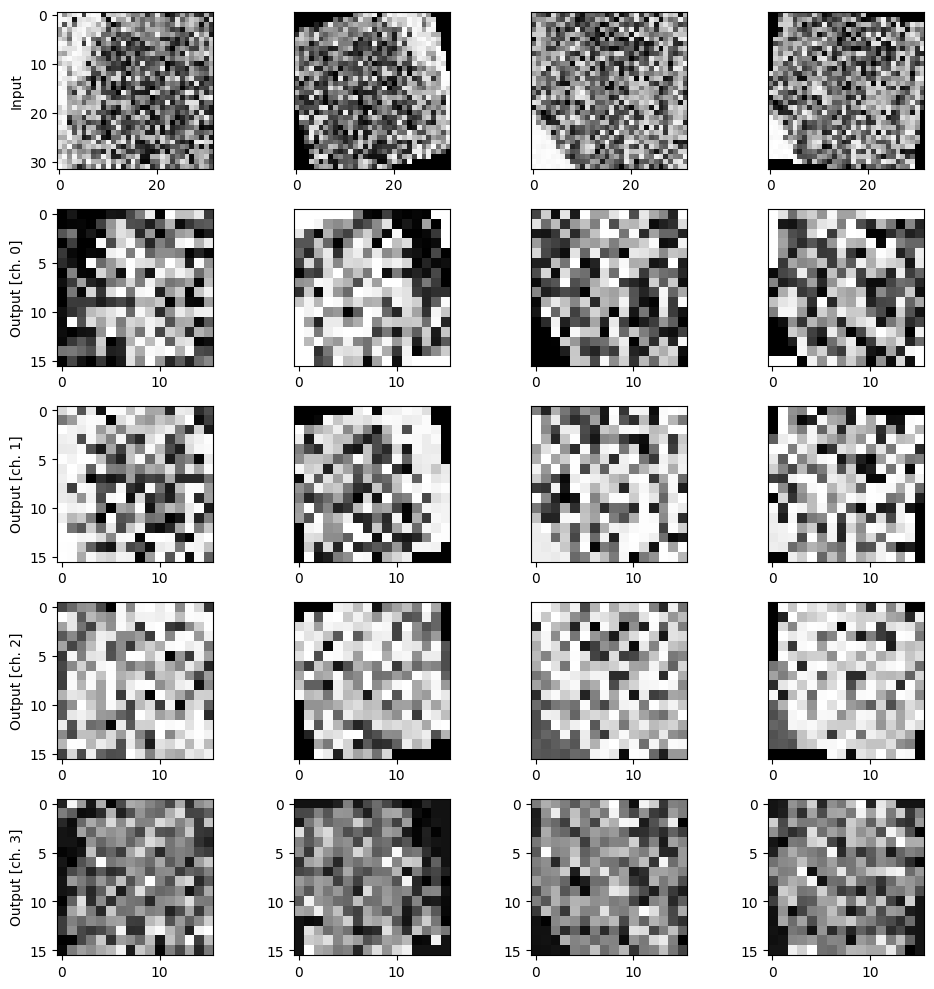

In [22]:
def plot_quanv_features():
    n_samples = 4
    n_channels = 4
    fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
    for k in range(n_samples):
        axes[0, 0].set_ylabel("Input")
        if k != 0:
            axes[0, k].yaxis.set_visible(False)
        axes[0, k].imshow(images[k, :, :, 0], cmap="gray")

        # Plot all output channels
        for c in range(n_channels):
            axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
            if k != 0:
                axes[c, k].yaxis.set_visible(False)
            axes[c + 1, k].imshow(q_images[k, :, :, c], cmap="gray")

    plt.tight_layout()
    plt.show()

plot_quanv_features()

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# Function to train the model
def train_model(model, dataloader, criterion, optimizer, num_epochs=10):
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloader)
        train_losses.append(epoch_loss)
        #print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

    return train_losses

def train_model_with_cross_validation(model, dataset, criterion, optimizer, num_epochs=10, num_folds=5, lambda_reg=0.01):
    train_losses = []
    val_losses = []

    accuracies = []

    # Create KFold cross-validation iterator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    for fold, (train_indices, val_indices) in enumerate(kf.split(dataset)):
        #print(f"Fold {fold + 1}/{num_folds}")

        # Create data loaders for this fold
        train_subset = torch.utils.data.Subset(dataset, train_indices)
        val_subset = torch.utils.data.Subset(dataset, val_indices)

        train_dataloader = torch.utils.data.DataLoader(train_subset, batch_size=32, shuffle=True)
        val_dataloader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=False)

        # Reset the model for each fold
        for layer in model.children():
            if hasattr(layer, 'reset_parameters'):
                layer.reset_parameters()

        fold_train_losses = []  # Training losses for this fold
        fold_val_losses = []  # Validation losses for this fold

        fold_accuracies = []

        for epoch in range(num_epochs):
            model.train()
            train_running_loss = 0.0

            for inputs, labels in train_dataloader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), labels)

                # Add L2 regularization term to the loss
                l2_regularization = 0.0
                for param in model.parameters():
                    l2_regularization += torch.norm(param, p=2)

                loss += lambda_reg * l2_regularization

                loss.backward()
                optimizer.step()

                train_running_loss += loss.item()

            train_epoch_loss = train_running_loss / len(train_dataloader)
            fold_train_losses.append(train_epoch_loss)
            #print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_epoch_loss:.4f}')

            model.eval()
            val_running_loss = 0.0

            epoch_labels = []
            epoch_preds = []

            with torch.no_grad():
                for inputs, labels in val_dataloader:
                    outputs = model(inputs)
                    preds = (outputs.squeeze() > 0.5).int()
                    epoch_preds.extend(preds.numpy())
                    epoch_labels.extend(labels.numpy())

                    loss = criterion(outputs.squeeze(), labels)
                    val_running_loss += loss.item()

            epoch_accuracy = accuracy_score(epoch_labels, epoch_preds)

            val_epoch_loss = val_running_loss / len(val_dataloader)
            fold_val_losses.append(val_epoch_loss)

            fold_accuracies.append(epoch_accuracy)

            #print(f'Epoch {epoch + 1}/{num_epochs}, Validation Loss: {val_epoch_loss:.4f}')

        train_losses.append(fold_train_losses)
        val_losses.append(fold_val_losses)

        accuracies.append(fold_accuracies)

    return train_losses, val_losses, accuracies

# Function to evaluate the model
def evaluate_model(model, dataloader, original_test_data):
    model.eval()
    all_preds, all_labels = [], []

    misclassified_idxs = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            preds = (outputs.squeeze() > 0.5).int()
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())

            # Check if the prediction is incorrect
            for i, (pred, label) in enumerate(zip(preds, labels)):
                if pred != label:
                    misclassified_idxs.append(i)

    misclassified_images = original_test_data[misclassified_idxs]

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)

    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, precision, recall, f1, cm, misclassified_images

In [24]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)


import torch.nn as nn

class ConvMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.5):
        super(ConvMLP, self).__init__()
        self.conv = nn.Conv2d(1, 4, kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 1, 32, 32)
        x = self.conv(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return self.sigmoid(x)


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from collections import defaultdict

def train_with_multiple_splits(model, num_splits, images, labels, params):

    lr = params[0]
    dropout_rate = params[1]
    lambda_reg = params[2]
    hidden_size = params[3]

    # Lists to store evaluation metrics and loss curves for each split
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    all_train_avg_loss_curves = []
    all_valid_avg_loss_curves = []
    all_avg_accuracies_curves = []
    min_losses = []
    cms = []
    misclassified_images_freqs = defaultdict(int) # won't be used by external function

    # Define a function to train and evaluate the model for one split
    def train_and_evaluate(split_idx, images, labels):
        print(f"Training and evaluating split {split_idx + 1}")

        indices = np.arange(len(images))
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test, _, idxs_test = train_test_split(images, labels, indices, test_size=0.2, random_state=split_idx, stratify=labels)
        original_test_data = images[idxs_test]

        # Standardize the features using PyTorch tensors
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Convert data to PyTorch tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
        X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

        # Create datasets and dataloaders
        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

        train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)
        test_dataloader = DataLoader(test_dataset, batch_size=40, shuffle=False)

        # Instantiate the new MLP model
        input_size = X_train.shape[1]
        output_size = 1
        mlp_model = model(input_size, hidden_size, output_size, dropout_rate)

        # Define loss function and optimizer
        criterion_mlp = nn.BCELoss()
        optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=lr)


        # Train the model
        train_losses_mlp, val_losses_mlp, accuracies_mlp = train_model_with_cross_validation(mlp_model, train_dataset, criterion_mlp, optimizer_mlp, num_epochs=30, num_folds=5, lambda_reg=lambda_reg)
        avg_train_losses = np.mean(train_losses_mlp, axis=0)
        avg_val_losses = np.mean(val_losses_mlp, axis=0)
        avg_accuracies = np.mean(accuracies_mlp, axis=0)

        # Store the loss curve for this split
        all_train_avg_loss_curves.append(avg_train_losses)
        all_valid_avg_loss_curves.append(avg_val_losses)
        all_avg_accuracies_curves.append(avg_accuracies)

        num_epochs = np.argmin(avg_val_losses) + 1
        print('Optimal Epochs:', num_epochs)

        # Definite model: 5 epochs
        mlp_model = model(input_size, hidden_size, output_size, dropout_rate)
        optimizer_mlp = optim.Adam(mlp_model.parameters(), lr=lr)
        train_losses_mlp = train_model(mlp_model, train_dataloader, criterion_mlp, optimizer_mlp, num_epochs=num_epochs)

        min_loss = np.min(train_losses_mlp)
        min_losses.append(min_loss)

        # Evaluate the model
        accuracy, precision, recall, f1, cm, misclassified_images = evaluate_model(mlp_model, test_dataloader, original_test_data)
        for image_id in misclassified_images:
            misclassified_images_freqs[str(image_id)] += 1

        cms.append(cm)

        # Store evaluation metrics for this split
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Flatten the features
    images_flat = images.reshape(images.shape[0], -1)

    # Run the training and evaluation loop for multiple splits
    for split_idx in range(num_splits):
        train_and_evaluate(split_idx, images_flat, labels)

    avg_train_loss_curve = np.mean(all_train_avg_loss_curves, axis=0)
    avg_valid_loss_curve = np.mean(all_valid_avg_loss_curves, axis=0)
    avg_accuracy_curve = np.mean(all_avg_accuracies_curves, axis=0)

    return accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, avg_train_loss_curve, avg_valid_loss_curve, avg_accuracy_curve


def report(accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, num_splits):

    # Calculate and print average metrics
    avg_accuracy = sum(accuracy_list) / len(accuracy_list)
    avg_precision = sum(precision_list) / len(precision_list)
    avg_recall = sum(recall_list) / len(recall_list)
    avg_f1 = sum(f1_list) / len(f1_list)
    avg_min_loss = sum(min_losses) / len(min_losses)
    avg_cm = sum(cms) / num_splits

    std_accuracy = np.std(np.array(accuracy_list))
    std_precision = np.std(np.array(precision_list))
    std_recall = np.std(np.array(recall_list))
    std_f1 = np.std(np.array(f1_list))
    std_min_loss = np.std(np.array(min_losses))
    std_cm = np.array([[np.std([cm[0, 0] for cm in cms]), np.std([cm[0, 1] for cm in cms])],
                    [np.std([cm[1, 0] for cm in cms]), np.std([cm[1, 1] for cm in cms])]])

    best_idx = np.argmax(np.array(f1_list))

    best_accuracy = accuracy_list[best_idx]
    best_precision = precision_list[best_idx]
    best_recall = recall_list[best_idx]
    best_f1 = f1_list[best_idx]
    best_min_loss = min_losses[best_idx]
    best_cm = cms[best_idx]

    print()
    print(f'Average Accuracy: {avg_accuracy:.8f}')
    print(f'Average Precision: {avg_precision:.8f}')
    print(f'Average Recall: {avg_recall:.8f}')
    print(f'Average F1 Score: {avg_f1:.8f}')
    print(f'Average Min Avg Loss: {avg_min_loss:.8f}')
    print(f'Average Confusion Matrix: {avg_cm}')
    print()

    print(f'Std Accuracy: {std_accuracy:.8f}')
    print(f'Std Precision: {std_precision:.8f}')
    print(f'Std Recall: {std_recall:.8f}')
    print(f'Std F1 Score: {std_f1:.8f}')
    print(f'Std Min Avg Train Loss: {std_min_loss:.8f}')
    print(f'Std Confusion Matrix: {std_cm}')
    print()

    return avg_cm

def plot_multiple_splits_loss_curve(avg_train_loss_curve, avg_valid_loss_curve, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(avg_train_loss_curve, label='Average Training Loss', marker='o', color='mediumblue', linestyle='-')
    plt.plot(avg_valid_loss_curve, label='Average Validation Loss', marker='o', color='crimson', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Average Loss')
    plt.title(f'{title} - Cross-Validation Loss Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_multiple_splits_accuracy_curve(avg_accuracy_curve, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(avg_accuracy_curve, label='Average Validation Accuracy', marker='o', color='mediumturquoise', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Average Accuracy')
    plt.title(f'{title} - Cross-Validation Accuracy Curve')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_multiple_splits_cms(avg_cm, title):

    # Plot Confusion Matrix
    plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.RdPu)
    plt.title(f'{title} - Confusion Matrix (Test Dataset)')
    plt.colorbar()
    plt.xticks([0, 1], ['Non-Syndrome', 'Syndrome'])
    plt.yticks([0, 1], ['Non-Syndrome', 'Syndrome'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def plot_accuracy_curves(accuracy_curves, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(accuracy_curves[0], label='CNN', marker='o', color='dodgerblue', linestyle='-')
    plt.plot(accuracy_curves[1], label='QNN', marker='o', color='mediumvioletred', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Validation Accuracy Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

def plot_loss_curves(loss_curves, title):

    # Set up the figure and axis
    plt.figure(figsize=(10, 6))

    # Plot loss curves for each model
    plt.plot(loss_curves[0], label='CNN', marker='o', color='dodgerblue', linestyle='-')
    plt.plot(loss_curves[1], label='QNN', marker='o', color='mediumvioletred', linestyle='-')

    # Set labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Validation Loss Curves')

    # Add legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()

Training and evaluating split 1
Optimal Epochs: 5
Training and evaluating split 2
Optimal Epochs: 5
Training and evaluating split 3
Optimal Epochs: 3
Training and evaluating split 4
Optimal Epochs: 3
Training and evaluating split 5
Optimal Epochs: 5
Training and evaluating split 6
Optimal Epochs: 4
Training and evaluating split 7
Optimal Epochs: 4
Training and evaluating split 8
Optimal Epochs: 5
Training and evaluating split 9
Optimal Epochs: 6
Training and evaluating split 10
Optimal Epochs: 5

Average Accuracy: 0.72750000
Average Precision: 0.72049573
Average Recall: 0.74750000
Average F1 Score: 0.73274624
Average Min Avg Loss: 0.36488720
Average Confusion Matrix: [[56.6 23.4]
 [20.2 59.8]]

Std Accuracy: 0.02549510
Std Precision: 0.03360504
Std Recall: 0.03944933
Std F1 Score: 0.02445090
Std Min Avg Train Loss: 0.08291635
Std Confusion Matrix: [[4.22374242 4.22374242]
 [3.15594677 3.15594677]]



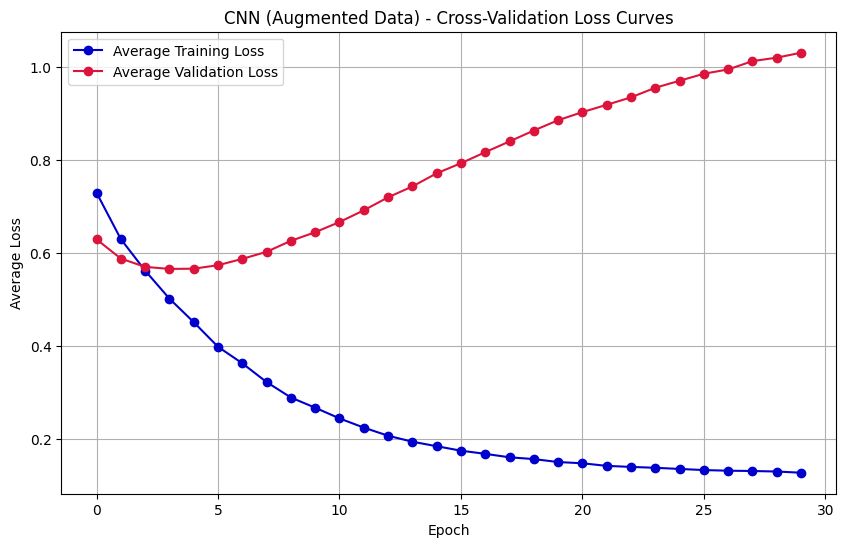

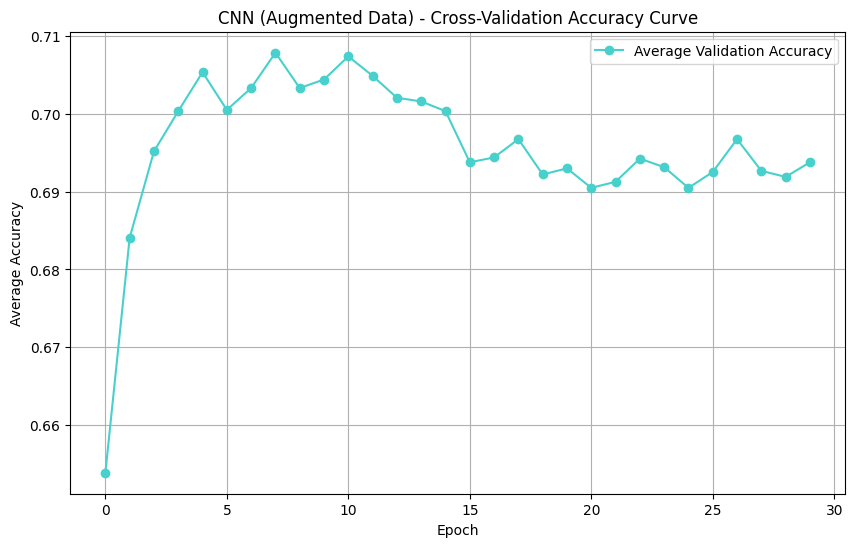

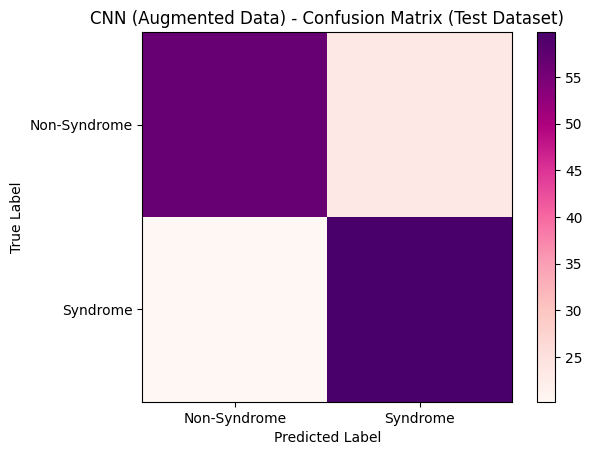

In [16]:
num_splits = 10

params = [0.001, 0.5, 0.01, 32]

accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, avg_train_loss_curve, avg_valid_loss_curve, avg_accuracy_curve = train_with_multiple_splits(ConvMLP, num_splits, images, labels, params)

avg_cm = report(accuracy_list, precision_list, recall_list, f1_list, min_losses, cms, num_splits)

plot_multiple_splits_loss_curve(avg_train_loss_curve, avg_valid_loss_curve, title='CNN (Augmented Data)')

plot_multiple_splits_accuracy_curve(avg_accuracy_curve, title='CNN (Augmented Data)')

plot_multiple_splits_cms(avg_cm, title='CNN (Augmented Data)')


Training and evaluating split 1
Optimal Epochs: 4
Training and evaluating split 2
Optimal Epochs: 3
Training and evaluating split 3
Optimal Epochs: 3
Training and evaluating split 4
Optimal Epochs: 3
Training and evaluating split 5
Optimal Epochs: 5
Training and evaluating split 6
Optimal Epochs: 4
Training and evaluating split 7
Optimal Epochs: 4
Training and evaluating split 8
Optimal Epochs: 4
Training and evaluating split 9
Optimal Epochs: 3
Training and evaluating split 10
Optimal Epochs: 4

Average Accuracy: 0.74875000
Average Precision: 0.74547040
Average Recall: 0.75750000
Average F1 Score: 0.75062043
Average Min Avg Loss: 0.22030079
Average Confusion Matrix: [[59.2 20.8]
 [19.4 60.6]]

Std Accuracy: 0.03398069
Std Precision: 0.03694686
Std Recall: 0.04847680
Std F1 Score: 0.03507490
Std Min Avg Train Loss: 0.05354470
Std Confusion Matrix: [[3.76297754 3.76297754]
 [3.87814389 3.87814389]]



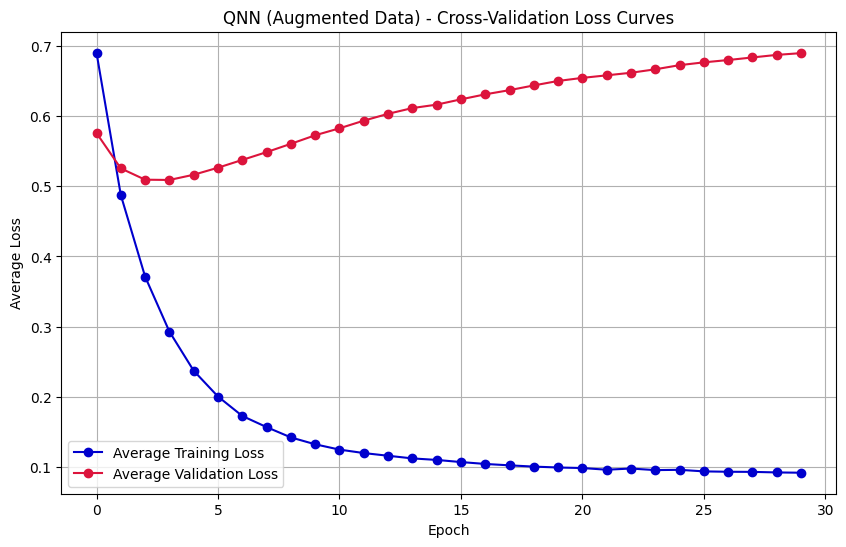

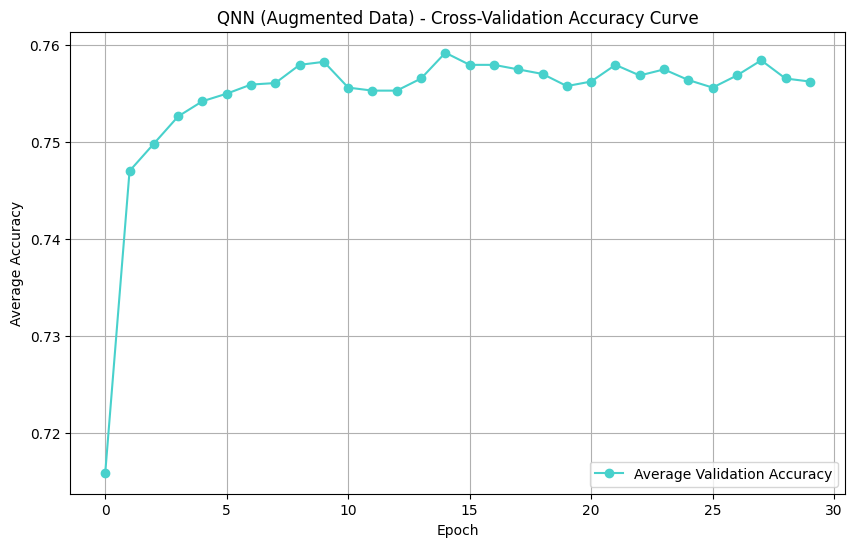

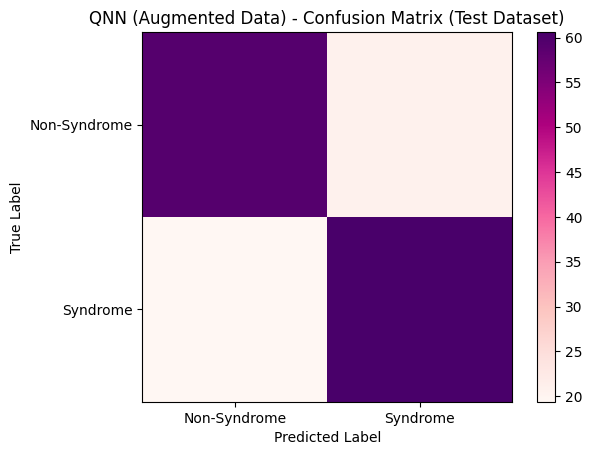

In [27]:
num_splits = 10

params = [0.001, 0.5, 0.01, 32]

q_accuracy_list, q_precision_list, q_recall_list, q_f1_list, q_min_losses, q_cms, q_avg_train_loss_curve, q_avg_valid_loss_curve, q_avg_accuracy_curve = train_with_multiple_splits(MLP, num_splits, q_images, labels, params)

q_avg_cm = report(q_accuracy_list, q_precision_list, q_recall_list, q_f1_list, q_min_losses, q_cms, num_splits)

plot_multiple_splits_loss_curve(q_avg_train_loss_curve, q_avg_valid_loss_curve, title='QNN (Augmented Data)')

plot_multiple_splits_accuracy_curve(q_avg_accuracy_curve, title='QNN (Augmented Data)')

plot_multiple_splits_cms(q_avg_cm, title='QNN (Augmented Data)')

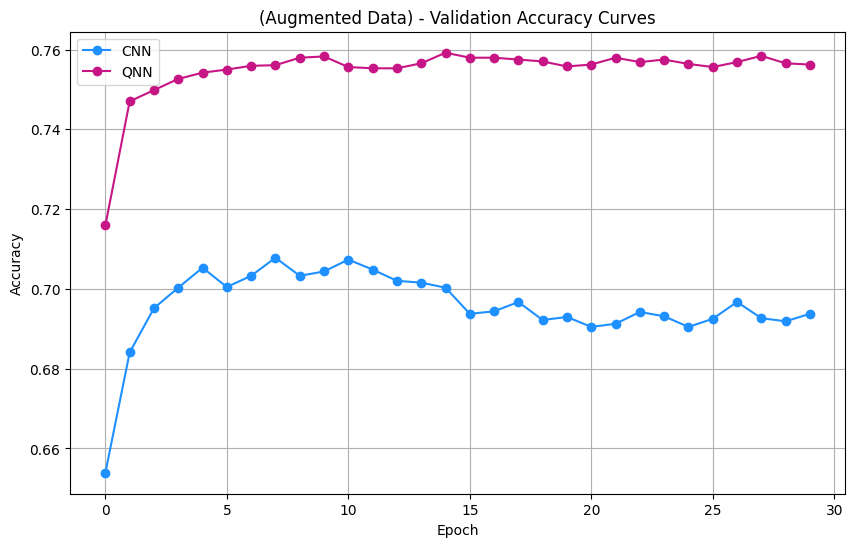

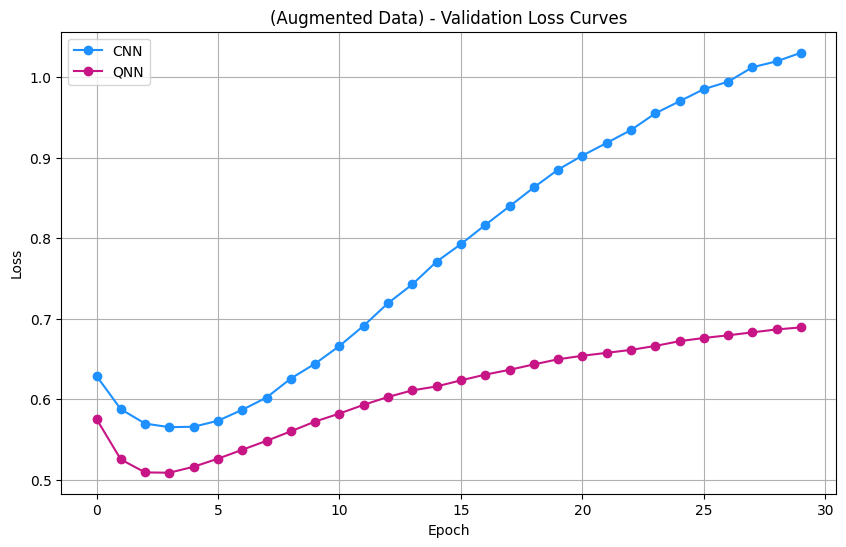

In [29]:
plot_accuracy_curves([avg_accuracy_curve, q_avg_accuracy_curve], title='(Augmented Data)')
plot_loss_curves([avg_valid_loss_curve, q_avg_valid_loss_curve], title='(Augmented Data)')